# Portfolio Optimization using the Efficient Frontier & Python.

In [4]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
#Create fictional portfolio 
assets =  ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [6]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [7]:
#Get the stock starting date
stockStartDate = '2013-01-01'

# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [8]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of stock into the data frame
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [9]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.378807,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.515701,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.635078,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.249001,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.424622,13.880000,365.280823
...,...,...,...,...,...
2020-08-03,251.960007,3111.889893,434.965759,498.619995,1474.449951
2020-08-04,249.830002,3138.830078,437.870514,509.640015,1464.969971
2020-08-05,249.119995,3205.030029,439.457642,502.109985,1473.609985


In [10]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History'

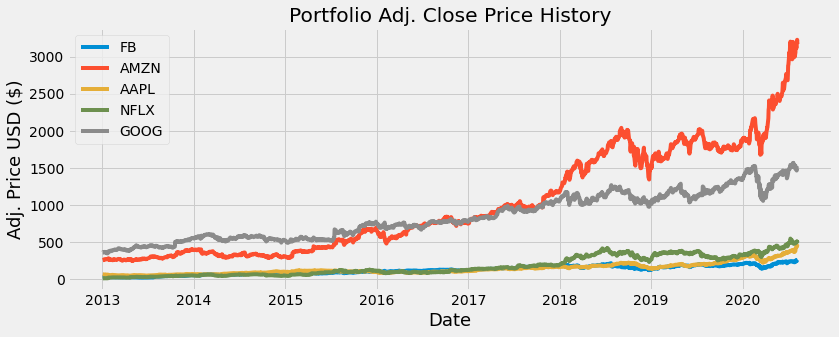

In [11]:
#Get the stocks
my_stocks = df

#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
    
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

# Financial Calculation

In [12]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-08-03,-0.006741,-0.016681,0.025198,0.019923,-0.005739
2020-08-04,-0.008454,0.008657,0.006678,0.022101,-0.006430
2020-08-05,-0.002842,0.021091,0.003625,-0.014775,0.005898


### co-variance matrix

In [13]:
"""determine how much two random variables vary or move together
The diagonal of the matrix are the variances and the other entries are the co-variances."""
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117348,0.052715,0.042448,0.054601,0.048801
AMZN,0.052715,0.092741,0.036639,0.061688,0.046750
AAPL,0.042448,0.036639,0.078009,0.032439,0.037261
NFLX,0.054601,0.061688,0.032439,0.212082,0.048971
GOOG,0.048801,0.046750,0.037261,0.048971,0.065011


### calculate and show the portfolio variance using the formula :
Expected portfolio variance= WT * (Covariance Matrix) * W

In [14]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.059592653433027956

### calculate and show the portfolio volatility using the formula :
Expected portfolio volatility= SQRT (WT * (Covariance Matrix) * W)

In [15]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.24411606549555062

### Portfolio Annual simple return

In [16]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3637935763014299

### Expected annual return, volatility or risk, and variance.

In [17]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 36.0%
Annual volatility/standard deviation/risk : 24.0%
Annual variance : 6.0%


In [18]:
pip install PyPortfolioOpt

ERROR: Operation cancelled by user


In [19]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [21]:
#Portfolio Optimization

**expected returns and the annualised sample covariance matrix of daily asset returns**

In [20]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [22]:
#optimize for max sharp ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.13555), ('AMZN', 0.29634), ('AAPL', 0.26205), ('NFLX', 0.30606), ('GOOG', 0.0)])
Expected annual return: 41.3%
Annual volatility: 26.3%
Sharpe Ratio: 1.49


(0.41255292546447064, 0.26341720441999966, 1.4902326760653546)

In [23]:
#get the discrete allocation of each share of the stock

In [24]:
pip install pulp

     |████████████████████████████████| 40.6MB 105kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for amply: filename=amply-0.1.2-cp36-none-any.whl size=16572 sha256=ad600f84783fa03b74f85fbaa34d38a59f47e4cb048f9dae79c2edd5667257fd
  Stored in directory: /root/.cache/pip/wheels/84/18/f7/e5c3ed13ed5bb721763f77d4a924331d59ef115ce61c9d26eb
Successfully built amply


In [25]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FB': 8.0, 'AMZN': 1.0, 'AAPL': 9.0, 'NFLX': 10.0}
Funds remaining: $737.67
